In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

In [27]:
df = pd.read_csv('final_df.csv')

In [28]:
df.head()

,Unnamed: 0,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [29]:
df.isna().sum()

Unnamed: 0            0
fighter_name          0
Height_cm             0
Weight_kg             0
Reach_cm              0
Stance                0
SLpM                  0
Str_Acc%              0
Strikes_absorbed/m    0
Str_Def%              0
TD_Avg                0
TD_Def%               0
Sub_Avg               0
weight_class          0
TD_Acc                0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3518 non-null   int64  
 1   fighter_name        3518 non-null   object 
 2   Height_cm           3518 non-null   float64
 3   Weight_kg           3518 non-null   int64  
 4   Reach_cm            3518 non-null   int64  
 5   Stance              3518 non-null   object 
 6   SLpM                3518 non-null   float64
 7   Str_Acc%            3518 non-null   float64
 8   Strikes_absorbed/m  3518 non-null   float64
 9   Str_Def%            3518 non-null   float64
 10  TD_Avg              3518 non-null   float64
 11  TD_Def%             3518 non-null   float64
 12  Sub_Avg             3518 non-null   float64
 13  weight_class        3518 non-null   object 
 14  TD_Acc              3518 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 412.4+

In [31]:
df_now = df.drop(columns=['Weight_kg'])

In [32]:
df_now = df_now.drop(df_now.columns[0], axis=1)
df_now.head()

,fighter_name,Height_cm,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [33]:
for col in ['Str_Acc%', 'Str_Def%', 'TD_Def%', 'TD_Acc']:
    df_now[col] = pd.to_numeric(df[col], errors='coerce')

In [34]:
df_now.head()

,fighter_name,Height_cm,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [36]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding a column named 'weather'
label_encoder = LabelEncoder()
df_now['Stance_encoded'] = label_encoder.fit_transform(df_now['Stance'])

In [37]:
# Print the mapping of classes to numbers
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class to Number Mapping:", class_mapping)
df_now.head()

Class to Number Mapping: {'Open Stance': 0, 'Orthodox': 1, 'Sideways': 2, 'Southpaw': 3, 'Switch': 4}


,fighter_name,Height_cm,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc,Stance_encoded
0,Felice Herrig,162.56,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0,1
1,Tecia Torres,154.94,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0,3
2,Loma Lookboonmee,154.94,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0,3
3,Amanda Lemos,162.56,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0,3
4,Carla Esparza,154.94,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0,1


In [40]:
# Move the 'Stance_encoded' column to the second position (index 1)
column_to_move = 'Stance_encoded'
new_position = 3

# Get a list of all columns
columns = list(df_now.columns)

# Remove the column to move and insert it at the new position
columns.insert(new_position, columns.pop(columns.index(column_to_move)))

# Reorder the DataFrame
df_now = df_now[columns]

# Display the updated DataFrame
df_now.head()

,fighter_name,Height_cm,Reach_cm,Stance_encoded,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,65,1,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,60,3,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,61,3,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,65,3,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,63,1,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [41]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Stance','fighter_name', 'Weight_kg', 'weight_class'], errors='ignore')
y = LabelEncoder().fit_transform(df['weight_class'])

f_values, p_values = f_classif(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)


               Feature      F-Score       p-Value
0           Unnamed: 0  4921.753148  0.000000e+00
2             Reach_cm  1730.497236  0.000000e+00
1            Height_cm   788.395268  0.000000e+00
6             Str_Def%    30.520271  6.704672e-36
3                 SLpM    17.403344  6.060358e-20
10              TD_Acc    15.237425  2.617698e-17
4             Str_Acc%     6.460817  8.672486e-07
5   Strikes_absorbed/m     4.174764  3.452803e-04
7               TD_Avg     2.101084  5.000909e-02
8              TD_Def%     1.845780  8.643215e-02
9              Sub_Avg     0.652231  6.883903e-01


               Feature  Importance
1             Reach_cm    0.283065
10              TD_Acc    0.138152
8              TD_Def%    0.118377
0            Height_cm    0.111770
7               TD_Avg    0.076277
3                 SLpM    0.067120
5   Strikes_absorbed/m    0.055352
6             Str_Def%    0.052991
4             Str_Acc%    0.051634
9              Sub_Avg    0.033627
2       Stance_encoded    0.011634


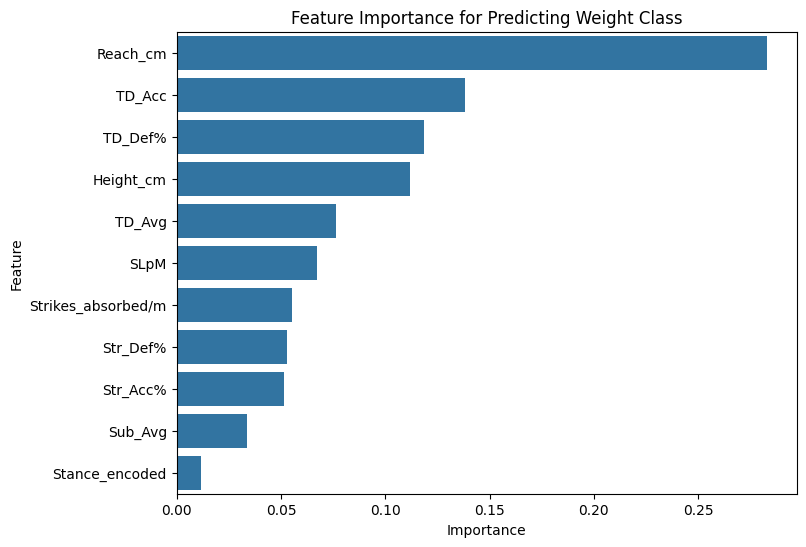

Weight Class Mapping (Encoded -> Text):
5: Straw Weight
0: Bantam Weight
3: Lightweight
4: Middleweight
2: Light Heavyweight
1: Heavyweight
6: Super Heavyweight


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df_now.select_dtypes(include='number').drop(columns=['Weight_kg', 'weight_class'], errors='ignore')
y = df_now['weight_class'].astype(str)  # Ensure weight_class is text

# Encode weight_class for modeling (but keep original labels for output)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y_encoded)

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Weight Class')
plt.show()

# Optional: Display weight class mapping (to clarify encoded labels)
weight_class_mapping = dict(zip(le.transform(y), y))
print("Weight Class Mapping (Encoded -> Text):")
for encoded, text in weight_class_mapping.items():
    print(f"{encoded}: {text}")

In [50]:
import pandas as pd

# Select numerical columns
numerical_cols = df_now.select_dtypes(include='number').columns.drop(['Weight_kg', 'weight_class'], errors='ignore')

# Ensure weight_class is text
df_now['weight_class'] = df_now['weight_class'].astype(str)

# Group by weight_class and compute statistics for each numerical column
stats = df_now.groupby('weight_class')[numerical_cols].describe()

# Extract relevant statistics (min, 25%, 50%, 75%, max)
range_df = stats[[(col, stat) for col in numerical_cols for stat in ['min', '25%', '50%', '75%', 'max']]]

# Reset index for better readability
range_df = range_df.reset_index()

# Save to CSV (optional)
# range_df.to_csv('feature_ranges_by_weight_class.csv', index=False)

# Print the table
range_df.head()

weight_class Height_cm                                 Reach_cm        \
                           min     25%     50%     75%     max      min   25%   
0      Bantam Weight    157.48  165.10  167.64  170.18  177.80     61.0  66.0   
1        Heavyweight    162.56  182.88  187.96  190.50  208.28     72.0  76.0   
2  Light Heavyweight    167.64  180.34  185.42  187.96  198.12     67.0  75.0   
3        Lightweight    154.94  167.64  172.72  175.26  193.04     63.0  69.0   
4       Middleweight    152.40  175.26  180.34  182.88  198.12     64.0  73.0   

               ... Sub_Avg                      TD_Acc                       \
    50%   75%  ...     min  25%  50%  75%   max    min    25%    50%    75%   
0  66.0  68.0  ...     0.0  0.0  0.2  0.8   7.7   10.0  35.00  44.09  46.00   
1  76.0  76.0  ...     0.0  0.0  0.0  0.5  20.9    7.0  52.44  52.88  52.88   
2  75.0  75.0  ...     0.0  0.0  0.0  0.6  21.9    8.0  44.00  45.69  45.69   
3  69.0  70.0  ...     0.0  0.0  0.0  0.8  20.9    5.0  34.50  43.63  46.00   
4  73.0  73.0  ...     0.0  0.0  0.0  0.8  21.6    5.0  38.00  47.04  47.04   

          
     max  
0  100.0  
1  100.0  
2  100.0  
3  100.0  
4  100.0  

[5 rows x 56 columns]

In [57]:
df_now['weight_class'].unique()

array(['Straw Weight', 'Bantam Weight', 'Lightweight', 'Middleweight',
       'Light Heavyweight', 'Heavyweight', 'Super Heavyweight'],
      dtype=object)

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


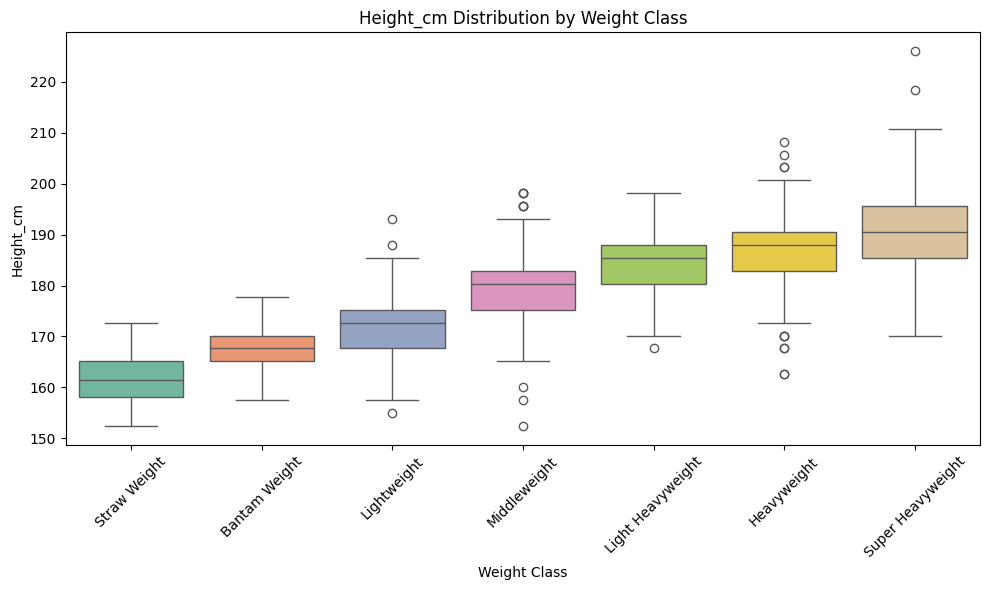

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


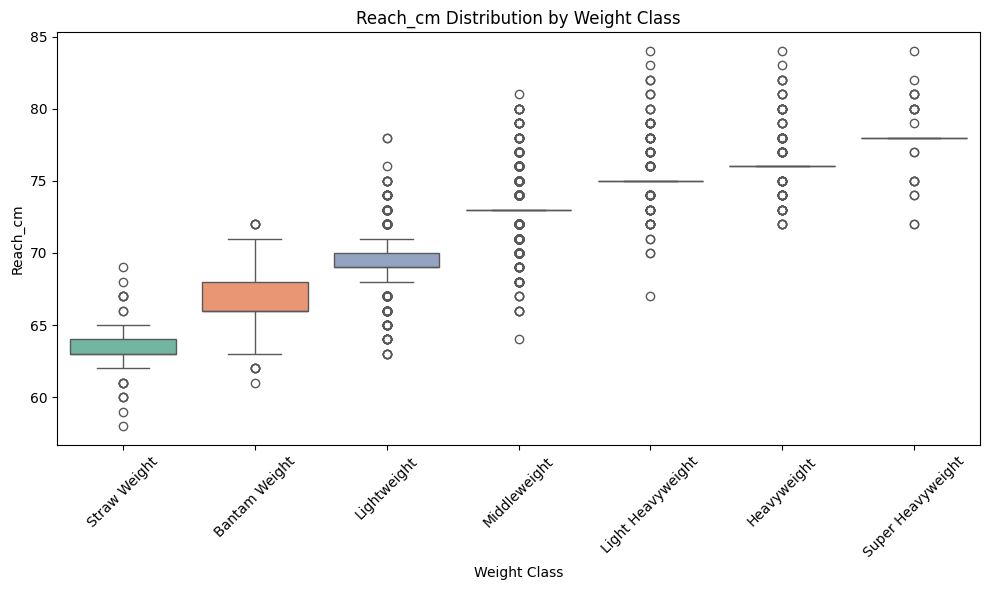

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


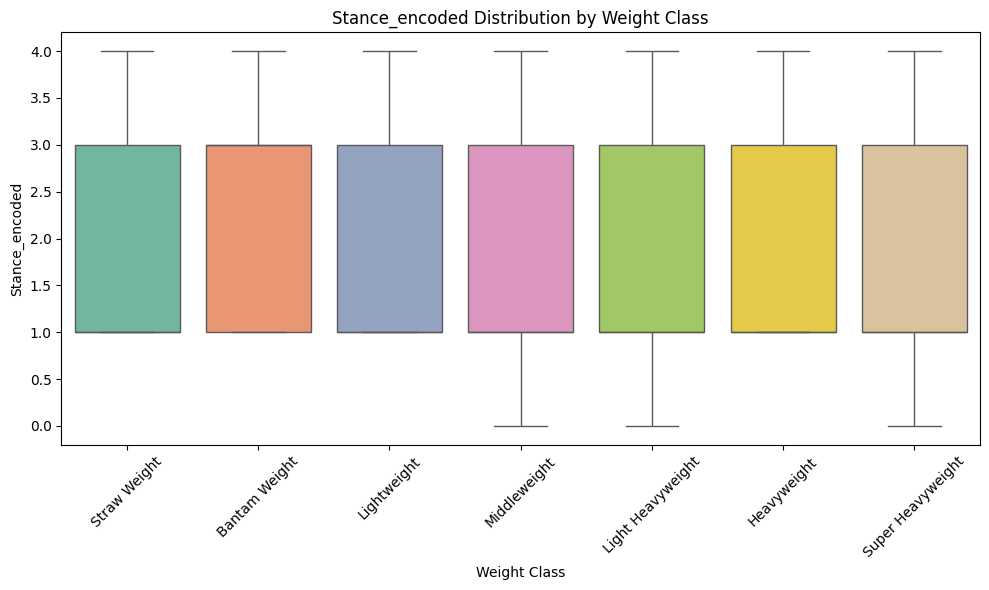

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


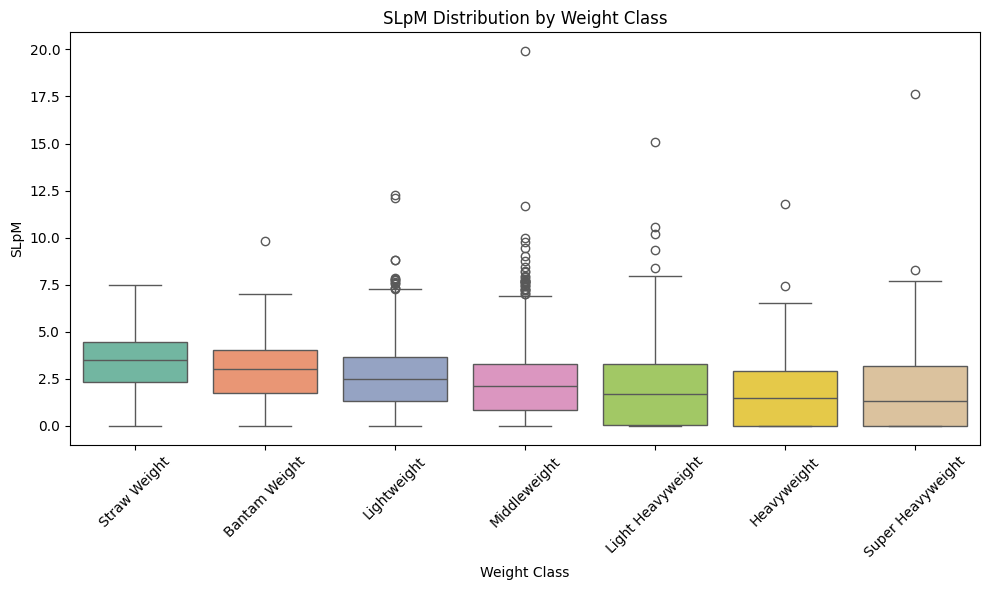

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


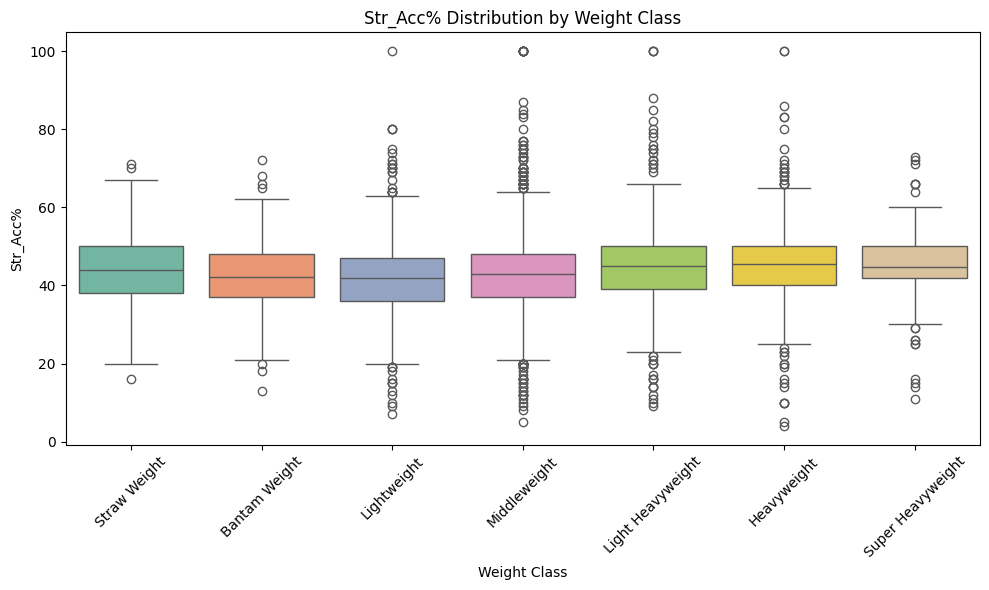

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


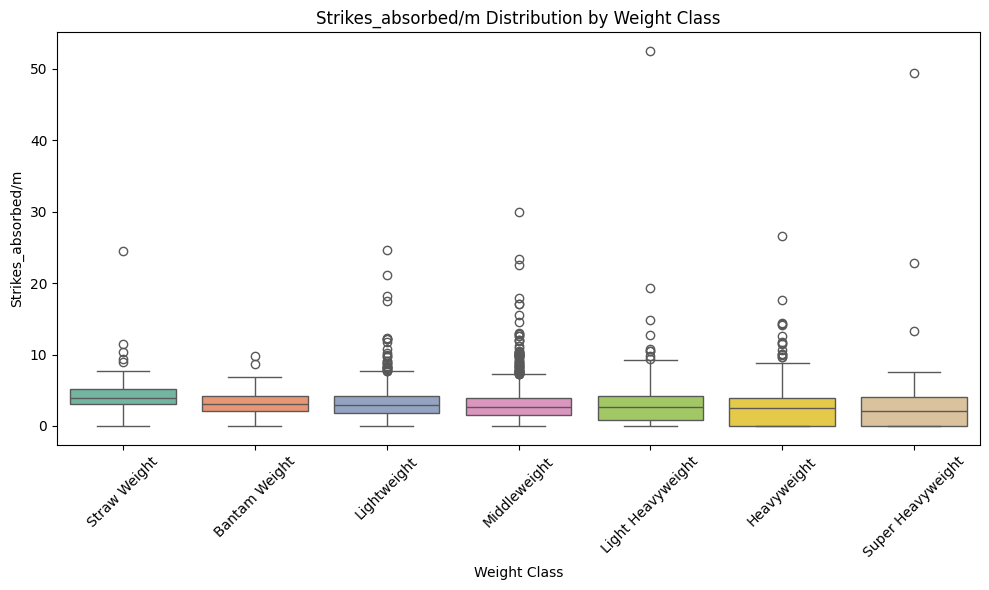

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


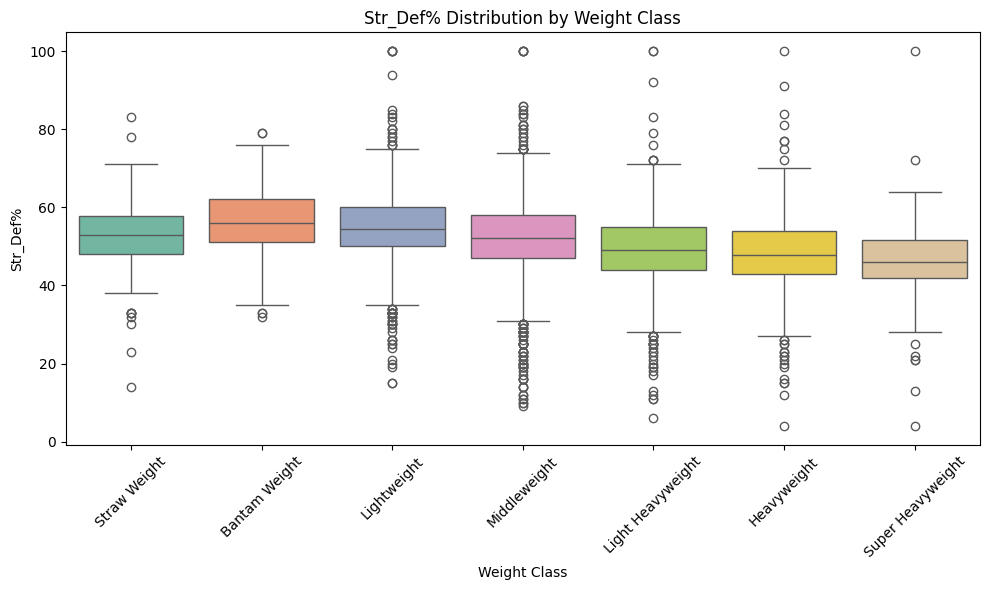

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


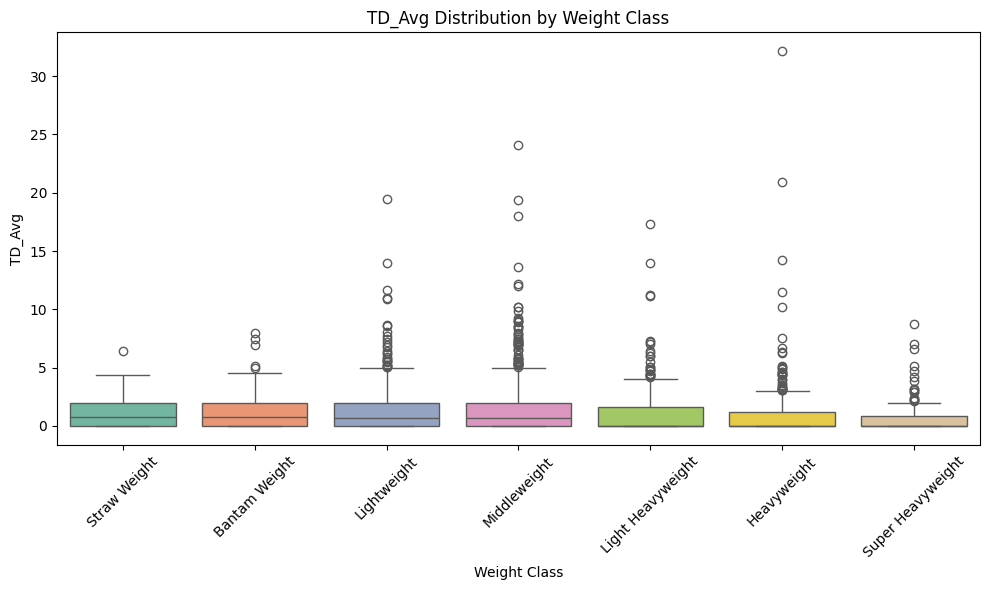

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


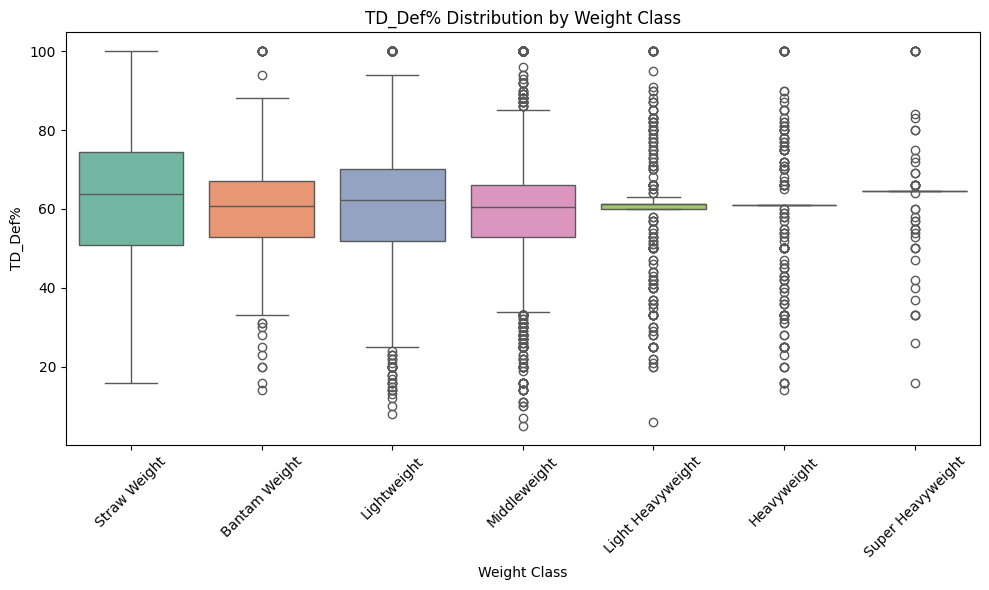

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


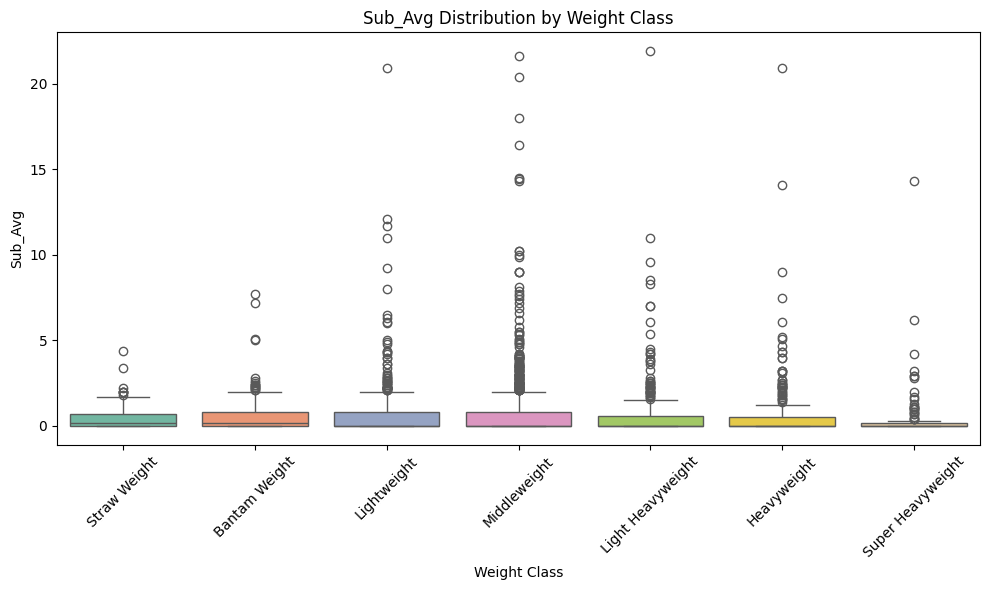

C:\Users\H\AppData\Local\Temp\ipykernel_18756\1700999373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')


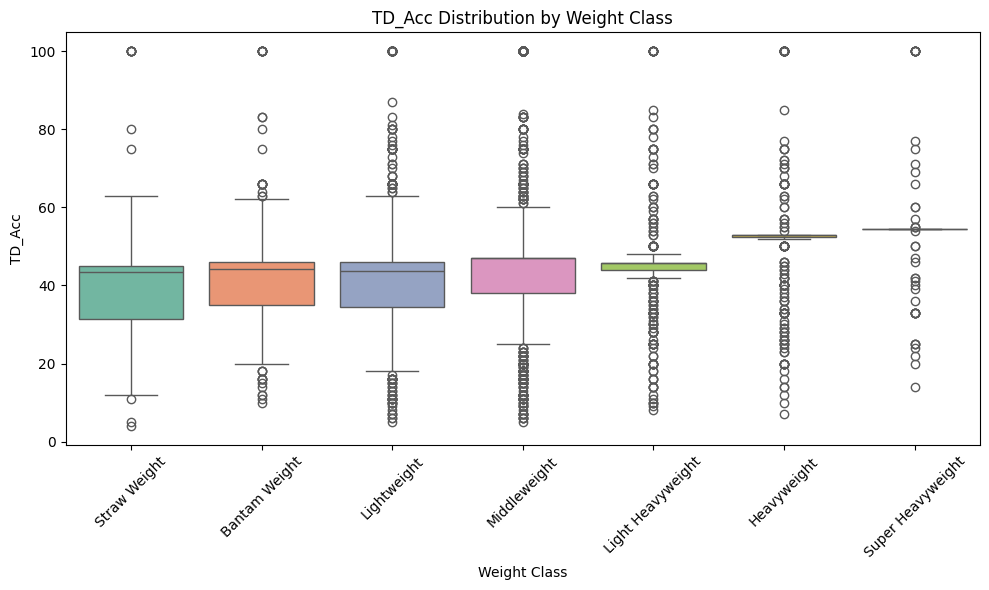

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numerical columns
numerical_cols = df_now.select_dtypes(include='number').columns.drop(['Weight_kg', 'weight_class'], errors='ignore')

# Ensure weight_class is text
df_now['weight_class'] = df_now['weight_class'].astype(str)

# Define order for weight classes (optional, customize as needed)
# weight_class_order = sorted(df_now['weight_class'].unique())  # Or ['Flyweight', 'Lightweight', 'Heavyweight']
weight_class_order = ['Straw Weight', 'Bantam Weight', 'Lightweight', 'Middleweight',
       'Light Heavyweight', 'Heavyweight', 'Super Heavyweight']
# Generate boxplots
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='weight_class', y=col, data=df_now, order=weight_class_order, palette='Set2')
    plt.title(f'{col} Distribution by Weight Class')
    plt.xlabel('Weight Class')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Select numerical columns
numerical_cols = df_now.select_dtypes(include='number').columns.drop(['Weight_kg', 'weight_class'], errors='ignore')

# Ensure weight_class is text
df_now['weight_class'] = df_now['weight_class'].astype(str)

# Define desired weight class order
desired_order = ['Straw Weight', 'Bantam Weight', 'Lightweight', 'Middleweight', 
                 'Light Heavyweight', 'Heavyweight', 'Super Heavyweight']

# Filter order to include only weight classes present in df_now
weight_class_order = [wc for wc in desired_order if wc in df_now['weight_class'].unique()]

# Group by weight_class and compute statistics
stats = df_now.groupby('weight_class')[numerical_cols].describe()

# Reorder the index to match weight_class_order
stats = stats.reindex(weight_class_order)

# Create a formatted DataFrame for ranges
range_data = []
for wc in weight_class_order:
    if wc in stats.index:
        wc_stats = stats.loc[wc]
        row = {'Weight Class': wc}
        for col in numerical_cols:
            # Interquartile range (25%–75%)
            iqr = f"{wc_stats[(col, '25%')]:.2f}–{wc_stats[(col, '75%')]:.2f}"
            # Full range (min–max)
            full = f"{wc_stats[(col, 'min')]:.2f}–{wc_stats[(col, 'max')]:.2f}"
            row[f'{col} IQR'] = iqr
            row[f'{col} Full Range'] = full
        range_data.append(row)

range_df = pd.DataFrame(range_data)
range_df

,Weight Class,Height_cm IQR,Height_cm Full Range,Reach_cm IQR,Reach_cm Full Range,Stance_encoded IQR,Stance_encoded Full Range,SLpM IQR,SLpM Full Range,Str_Acc% IQR,...,Str_Def% IQR,Str_Def% Full Range,TD_Avg IQR,TD_Avg Full Range,TD_Def% IQR,TD_Def% Full Range,Sub_Avg IQR,Sub_Avg Full Range,TD_Acc IQR,TD_Acc Full Range
0,Straw Weight,158.12–165.10,152.40–172.72,63.00–64.00,58.00–69.00,1.00–3.00,1.00–4.00,2.35–4.46,0.00–7.47,38.00–50.00,...,48.00–57.75,14.00–83.00,0.00–1.96,0.00–6.47,50.75–74.50,16.00–100.00,0.00–0.70,0.00–4.40,31.50–45.00,4.00–100.00
1,Bantam Weight,165.10–170.18,157.48–177.80,66.00–68.00,61.00–72.00,1.00–3.00,1.00–4.00,1.74–4.04,0.00–9.80,37.00–48.00,...,51.00–62.00,32.00–79.00,0.00–1.93,0.00–8.00,53.00–67.00,14.00–100.00,0.00–0.80,0.00–7.70,35.00–46.00,10.00–100.00
2,Lightweight,167.64–175.26,154.94–193.04,69.00–70.00,63.00–78.00,1.00–3.00,1.00–4.00,1.31–3.69,0.00–12.29,36.00–47.00,...,50.00–60.00,15.00–100.00,0.00–2.01,0.00–19.42,52.00–70.00,8.00–100.00,0.00–0.80,0.00–20.90,34.50–46.00,5.00–100.00
3,Middleweight,175.26–182.88,152.40–198.12,73.00–73.00,64.00–81.00,1.00–3.00,0.00–4.00,0.83–3.30,0.00–19.91,37.00–48.00,...,47.00–58.00,9.00–100.00,0.00–2.00,0.00–24.11,53.00–66.00,5.00–100.00,0.00–0.80,0.00–21.60,38.00–47.04,5.00–100.00
4,Light Heavyweight,180.34–187.96,167.64–198.12,75.00–75.00,67.00–84.00,1.00–3.00,0.00–4.00,0.06–3.27,0.00–15.07,39.00–50.00,...,44.00–55.00,6.00–100.00,0.00–1.67,0.00–17.31,60.00–61.24,6.00–100.00,0.00–0.60,0.00–21.90,44.00–45.69,8.00–100.00
5,Heavyweight,182.88–190.50,162.56–208.28,76.00–76.00,72.00–84.00,1.00–3.00,1.00–4.00,0.00–2.92,0.00–11.78,40.00–50.00,...,43.00–54.00,4.00–100.00,0.00–1.23,0.00–32.14,60.94–60.94,14.00–100.00,0.00–0.50,0.00–20.90,52.44–52.88,7.00–100.00
6,Super Heavyweight,185.42–195.58,170.18–226.06,78.00–78.00,72.00–84.00,1.00–3.00,0.00–4.00,0.00–3.18,0.00–17.65,42.00–50.00,...,42.00–51.50,4.00–100.00,0.00–0.83,0.00–8.71,64.51–64.51,16.00–100.00,0.00–0.15,0.00–14.30,54.42–54.42,14.00–100.00
